### Christian Holm Christensen <a class='tocSkip'></a>

# Computer Algebra System<a class='tocSkip'></a>
## In upcoming Mat-1-F<a class='tocSkip'></a>
## September, 2019 <a class='tocSkip'></a>

> A few thoughts on 
> [Computer Algebra Systems](https://en.wikipedia.org/wiki/Computer_algebra_system) 
> (CAS) and their possible use in an introductory Mathematics course for Physicists.  
> 
> An example note is available from 
> [https://cholmcc.gitlab.io/nbi-python](https://cholmcc.gitlab.io/nbi-python#Symbolic)

### Niels Bohr Institute <a class='tocSkip'></a>

# Computer Algebra Systems (CAS)

Quoting [Wikipedia](https://en.wikipedia.org/wiki/Computer_algebra_system):

> A computer algebra system (CAS) is any mathematical software with the ability to manipulate mathematical
> expressions in a way similar to the traditional manual computations of mathematicians and scientists. 

## Examples of CASs 

- Mathematica 
- Maple
- Axiom 
- Maxima
- SageMath
- SymPy

(see also [Wikipedia](https://en.wikipedia.org/wiki/List_of_computer_algebra_systems) for a longer list).

# What's wrong with pencil and paper? 

Paraphrasing Ian 

> It worked for Newton so why isn't it good enough for me?

**Nothing**

Pencil-and-paper skills absolutely needed 

- Strengthens mathematical intuition 
- Facilitate _critical_ use of CAS
- Computers are dumb 

# Then, why use CAS?

- Check calculations 
- Plotting 
- A skill the students will use later on 
  - Calculate expectation values of obscure distributions 
  - Check matrix inversions 
  - ...
- Could also be used in Physics courses 
  - The maths isn't the important thing - physics is 
- Could be used for exercises in proofs 
  - In proofs, the mathematical intuition is paramount, get the calculations right isn't. 

# Some CASs 

| *Name*      | *Price*    | *Language*  | *UI*      | *Comments*                                     |
|:----------- | :--------- | :---------- | --------- | ---------------------------------------------- |
| Mathematica | \$70-2500  | Special     | Dedicated | Very capable (_not_ omnipotent), hard to learn |
| Maple       | \$80-2400  | Special     | Dedicated | Capable, easier to learn, used by Mat          |
| Maxima      | Free/Libre | Special     | Shell     | Capable, hard to learn                         |
| Axiom       | Free/Libre | Special     | Shell     | Very capable, hard to learn                    |
| MatLab      | \$200-3200 | M           | Dedicated | Plug-in for matlab, somewhat capable           |
| SageMath    | Free/Libre | Multi       | Shell/NB  | Front-end for Axiom,Maxima,SymPy,etc.          |
| SymPy       | Free/Libre | Python      | Shell/NB  | Capable, easy to learn, same as other courses  |


(see also [Wikipedia](https://en.wikipedia.org/wiki/List_of_computer_algebra_systems))

Of these _only_ SymPy run on all of 

> Linux, MacOSX, Windows, Android, iOS, and more

# The case for SymPy

- Free/Libre - readily available for all at any time
- Runs everywhere - from server to mobile
- Same language as in other courses 
  - Mat-1-F can leverage skills learned in say 1st lab 
  - Lower barrier for getting started - no need to learn new language or interface
- Notebooks via Jupyter
- Possibility to make exercises with immediate feedback (_nbgrader_ on ERDA)

- Readily turn expressions into numerical calculations 
- Strong _mechanics_ sub-module perhaps useful in Fys-1 
- Quantum mechanics module perhaps useful in Kvant 

# Up next - an example note

Next I will show an example note 

- Done in a Jupyter Notebook 
  - Integrated $\mathrm{\LaTeX}$ 
  - Mix code and text 
  - Convenient for illustrations 
- Exported to 
  - PDF
  - HTML web page 
  - Slides (like this presentation) 

Let's go 

> [https://cholmcc.gitlab.io/nbi-python/#Symbolic](https://cholmcc.gitlab.io/nbi-python/#Symbolic)

# Back-up

# Example from AppStat exam 2018

Given the probability density function 

$$ f(x) = C\left(1-e^{-ax}\right)\quad\mathrm{for}\quad x\in[0,2]\quad a=2\quad,$$

find $C$ so that $\int_0^2\mathrm{d}x f(x) = 1$, and sample the distribution 500 times. 

## Solution using SymPy 

First, we import SymPy, define our variables and function, and evaluate the integral 

In [1]:
from sympy import exp,solve,integrate,Eq,Lambda
from sympy.abc import C,a,x,t,y

f = C*(1-exp(-a*x))
C1 = solve(f.subs({a:2}).integrate((x,0,2))-1,C)[0]
Eq(C,C1)

Eq(C, 2*exp(4)/(1 + 3*exp(4)))

Next, we find the Quantile function $Q$, from the cumulative density function $F$  

$$Q = F^{-1}\quad F(x) = \int_0^{x}\mathrm{d}t\,f(t)\quad.$$

In [2]:
F = f.subs({a:2,x:t}).integrate((t,0,x))
Q = solve(y - F,x)[0]
Q

LambertW(-exp(-1)*sqrt(exp(-4*y/C)))/2 + 1/2 + y/C

## Sampling using NumPy

We can sample the PDF $f$ 500 times by choosing 500 uniformly distributed numbers and evaluate $Q$ at each point

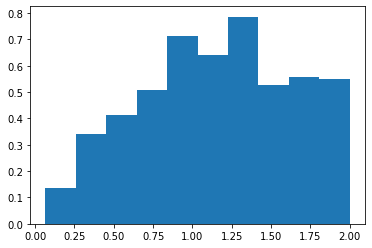

In [3]:
from matplotlib.pyplot import hist, show
from numpy.random import uniform
l = Lambda(y,Q.subs({a:2,C:C1}))
sample = [float(l(r).evalf()) for r in uniform(size=500)]
hist(sample,density=True)
show()

## In Mathematica 

    f[x_] = C * (1 - Exp[-a*x])
    F[x_] = Integrate[f[t],{t,0,x}]
    Solve[y-F[x] == 0, x]

## In Maple

    f(x) := x -> C * (1 - exp(-a * x))
    F := integrate(f(t), {t,0,x})
    solve(y - F)

In [4]:
from IPython.core.display import HTML
### BEGIN hide_toggle
### END hide_toggle
### BEGIN css_styling
def css_styling():
    try:
        styles = """
        <style>
        .rendered_html {
            font-family: Palatino, serif
        }
        h1, h2, h3, h4 {
            font-style: oblique;  
        }
        .rendered_html h1:first-child {
            margin-top: 4ex;
        }
        .rendered_html h1 {
            margin-bottom: 2ex;
            font-weight: normal;
            font-size: 220%;
        }
        .rendered_html h2 {
            font-weight: normal;
            font-size: 180%;
        }
        .rendered_html h3 {
            font-weight: normal
        }
        .rendered_html h4 {
            font-weight: normal
        }
        .rendered_html p code {
            padding: 0;
        }
        .rendered_html table {
            font-size: 120%;
        }
        .CodeMirror, code, div.input_area {
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
            background: lightyellow;
        }
        .output_text, .output_stream, .output_stdout {
            background: lavender;
        }
        </style>
        """
        return HTML(styles)
    except:
        pass
    return None
### END css_styling
css_styling()